
# SIEM Alert Prioritization – Model Explainability (SHAP)

## Objective
Explain the predictions of the trained ML model using SHAP.
This notebook helps answer **why** an alert was classified as high or low risk,
which is critical for SOC analyst trust and decision-making.


**Imports**

In [5]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

**Load features and trained model**

In [6]:
X = pd.read_csv("siem_features.csv")
model = joblib.load("siem_alert_priority_model.pkl")

X.shape


(2000, 2242)


## 1. Create SHAP Explainer

TreeExplainer is fast and ideal for Random Forest models.


In [7]:

explainer = shap.TreeExplainer(model)



## 2. Sample Data for SHAP (IMPORTANT)

We limit samples to avoid long runtimes in Colab.


In [8]:
X_sample = X.sample(n=50, random_state=42)
X_sample.shape

(50, 2242)


## 3. Compute SHAP Values


In [11]:
shap_values = explainer.shap_values(X_sample, check_additivity=False)


## 4. Global Explainability
Which features generally influence alert risk?


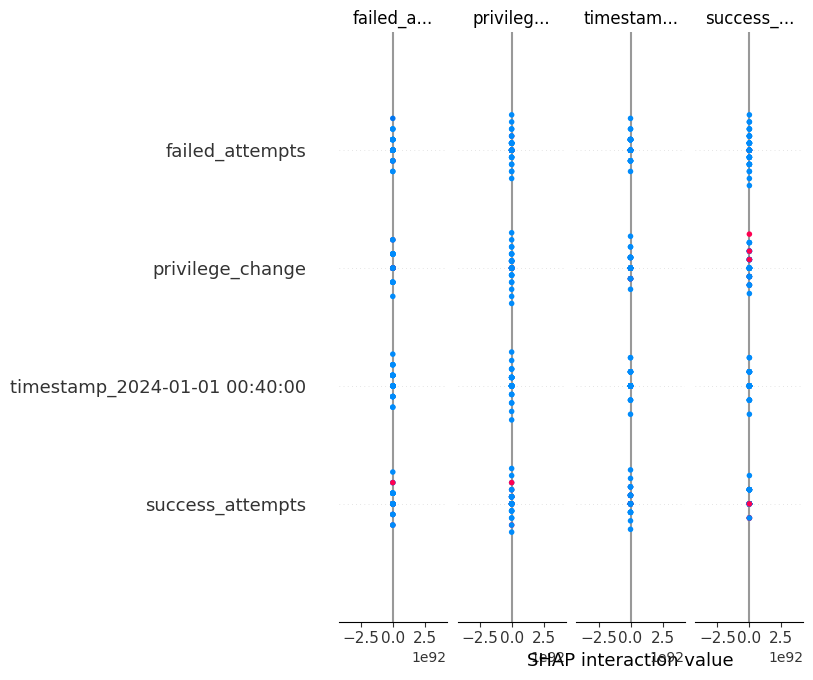

In [12]:

shap.summary_plot(shap_values, X_sample)



## 5. Feature Importance (Bar Plot)


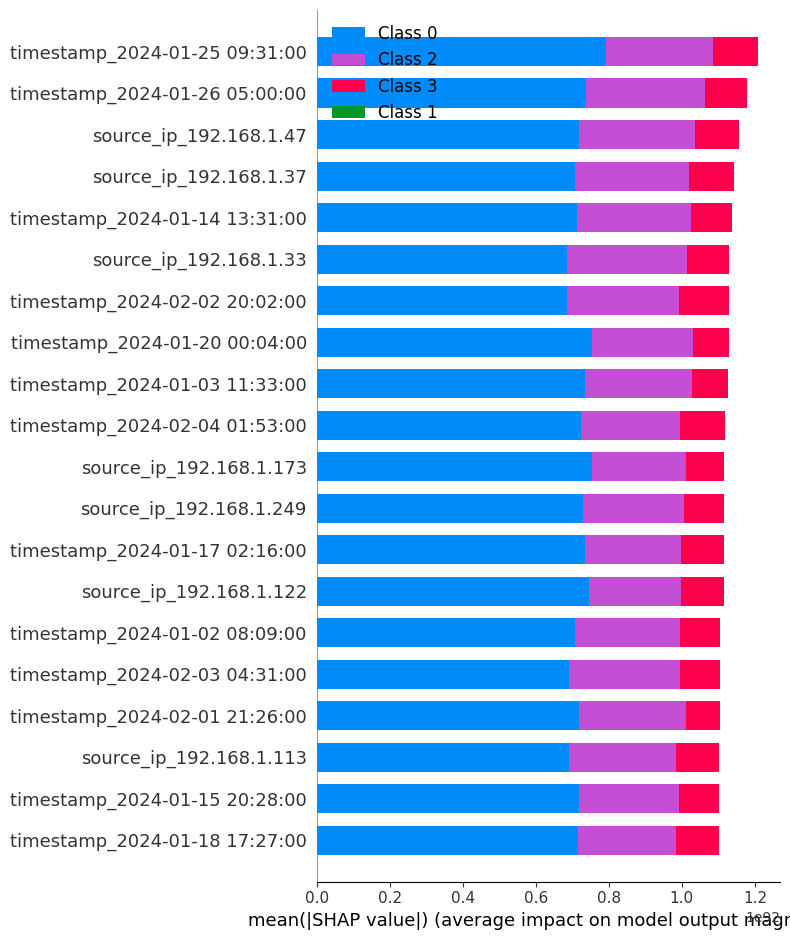

In [13]:

shap.summary_plot(shap_values, X_sample, plot_type="bar")



## 6. Local Explainability (Single Alert)

Explain why ONE alert was classified as risky.


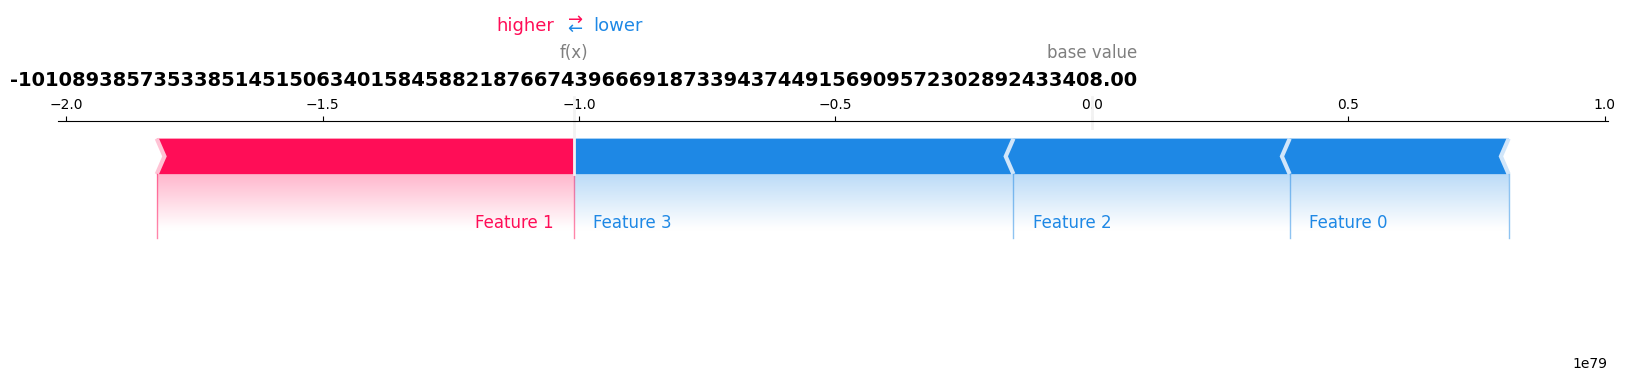

In [15]:

alert_index = 0
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][alert_index],
    matplotlib=True
)



## SOC Interpretation

- Positive SHAP value → increases alert risk
- Negative SHAP value → decreases alert risk

This enables analysts to trust and validate ML decisions.



## Summary

- Explained model predictions using SHAP
- Identified global risk-driving features
- Enabled per-alert justification

This completes the SIEM Alert Prioritization ML pipeline.
